# Zestaw zadań: Efekt Rungego
## Zadanie 1
### Autor: Artur Gęsiarz

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### Funkcje Rungego

In [136]:
def f1(x):
    return 1 / (1 + 25 * x ** 2)

def f2(x):
    return np.exp(np.cos(x))

### Węzły interpolacji równoodległe

In [137]:
def equidistant_nodes(n):
    return np.linspace(-1, 1, n + 1)

### Węzły interpolacji Czebyszewa

In [138]:
def chebyshev_nodes(n):
    theta = np.pi * (2 * np.arange(n + 1) + 1) / (2 * (n + 1))
    return np.cos(theta)

### Metoda Lagrange'a

In [139]:
def lagrange_interpolation(x, nodes, values):
    result = 0
    n = len(nodes)
    for i in range(n):
        term = values[i]
        for j in range(n):
            if i != j:
                term *= (x - nodes[j]) / (nodes[i] - nodes[j])
        result += term
    return result

### Próbkowanie funkcji

In [140]:
x_dense = np.linspace(-1, 1, 1000)
y_dense = f1(x_dense)

### Liczba węzłów interpolacji

In [141]:
n = 12

### Węzły interpolacji

In [142]:
nodes_equidistant = equidistant_nodes(n)
nodes_chebyshev = chebyshev_nodes(n)

### Wartościami funkcji w węzłach interpolacji

In [143]:
values_equidistant = f1(nodes_equidistant)
values_chebyshev = f1(nodes_chebyshev)

### Interpolacja Lagrange'a

In [144]:
y_interpolated_equidistant = lagrange_interpolation(x_dense, nodes_equidistant, values_equidistant)
y_interpolated_chebyshev = lagrange_interpolation(x_dense, nodes_chebyshev, values_chebyshev)

### Sortowanie węzłów

In [145]:
sorted_indices_equidistant = np.argsort(nodes_equidistant)
sorted_indices_chebyshev = np.argsort(nodes_chebyshev)

nodes_equidistant_sorted = nodes_equidistant[sorted_indices_equidistant]
nodes_chebyshev_sorted = nodes_chebyshev[sorted_indices_chebyshev]

values_equidistant_sorted = values_equidistant[sorted_indices_equidistant]
values_chebyshev_sorted = values_chebyshev[sorted_indices_chebyshev]

### Interpolacja funkcji sklejanych

In [146]:
cs_equidistant = CubicSpline(nodes_equidistant_sorted, values_equidistant_sorted)
cs_chebyshev = CubicSpline(nodes_chebyshev_sorted, values_chebyshev_sorted)

### Wykres ze wszystkim

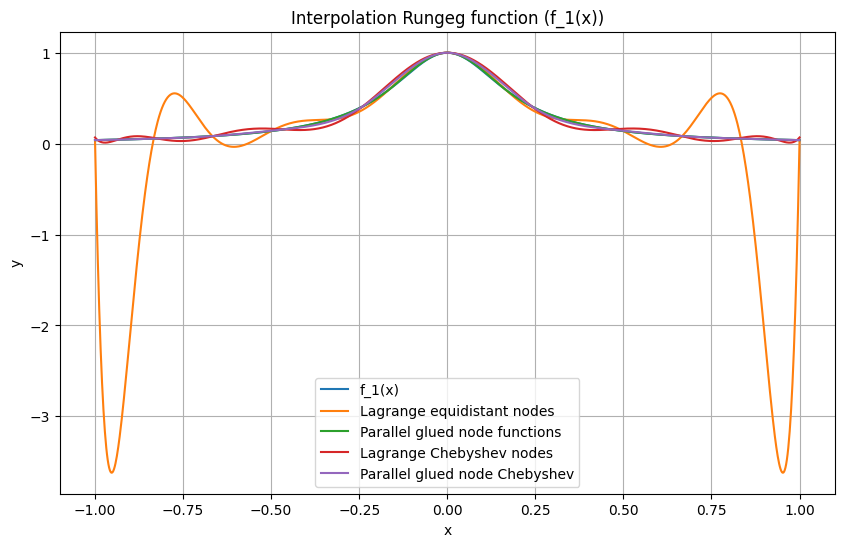

In [147]:
plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label='f_1(x)')
plt.plot(x_dense, y_interpolated_equidistant, label="Lagrange equidistant nodes")
plt.plot(x_dense, cs_equidistant(x_dense), label="Parallel glued node functions")
plt.plot(x_dense, y_interpolated_chebyshev, label="Lagrange Chebyshev nodes")
plt.plot(x_dense, cs_chebyshev(x_dense), label="Parallel glued node Chebyshev")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Rungeg function (f_1(x))')
plt.legend()
plt.grid(True)
plt.show()

### Wykres porównujący f_1(x) z wielomianem interpolacyjnym Lagrange'a z równoodległymi węzłami

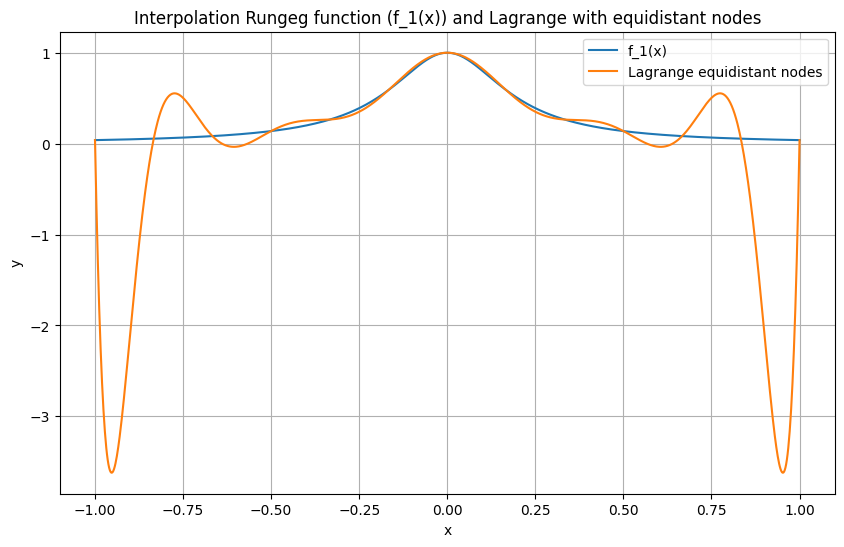

In [148]:
plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label='f_1(x)')
plt.plot(x_dense, y_interpolated_equidistant, label="Lagrange equidistant nodes")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Rungeg function (f_1(x)) and Lagrange with equidistant nodes')
plt.legend()
plt.grid(True)
plt.show()

### Wykres porównujący f_1(x) z funkcją sklejoną z równoległymi węzłami

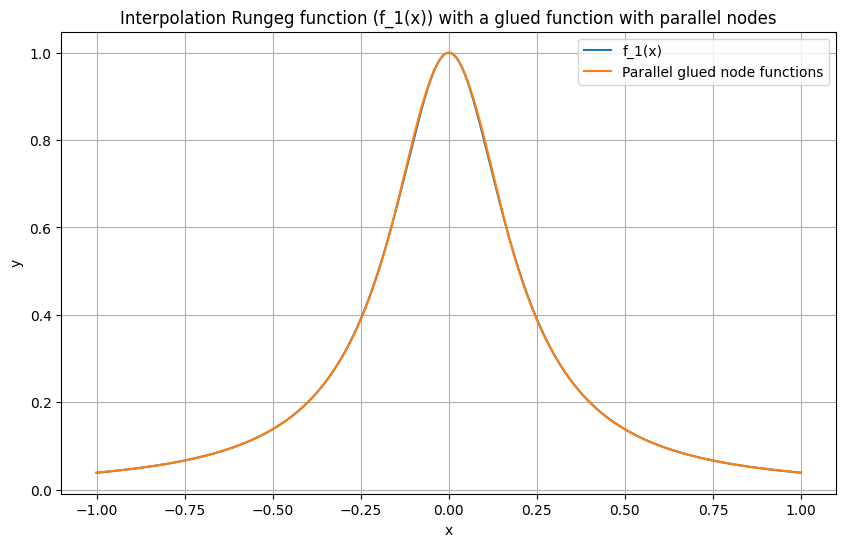

In [149]:
plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label='f_1(x)')
plt.plot(x_dense, cs_equidistant(x_dense), label="Parallel glued node functions")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Rungeg function (f_1(x)) with a glued function with parallel nodes')
plt.legend()
plt.grid(True)
plt.show()

### Wykres porównujący f_1(x) z wielomianem interpolacyjnym Lagrange'a z węzłami Czebyszywa

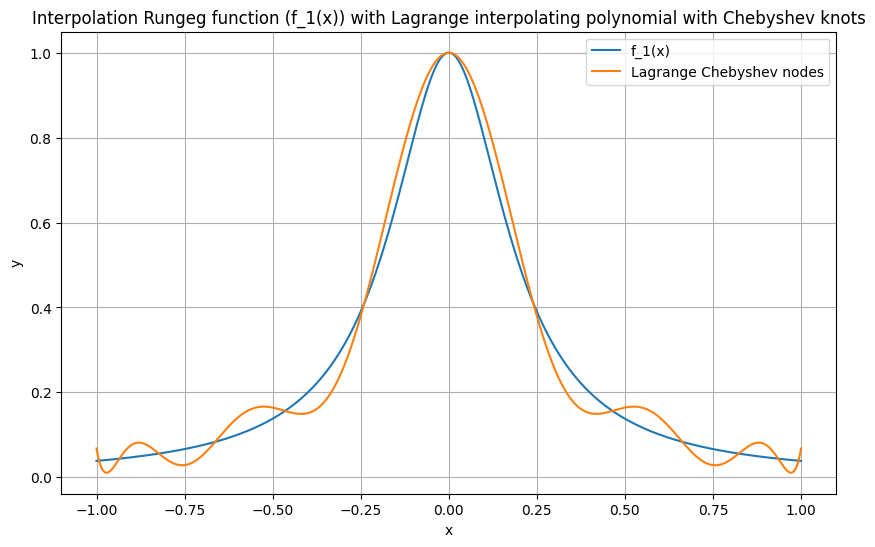

In [150]:
plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label='f_1(x)')
plt.plot(x_dense, y_interpolated_chebyshev, label="Lagrange Chebyshev nodes")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Rungeg function (f_1(x)) with Lagrange interpolating polynomial with Chebyshev knots')
plt.legend()
plt.grid(True)
plt.show()

### Wykres porównujący f_1(x) z funkcją sklejoną z węzłami Czebyszywa

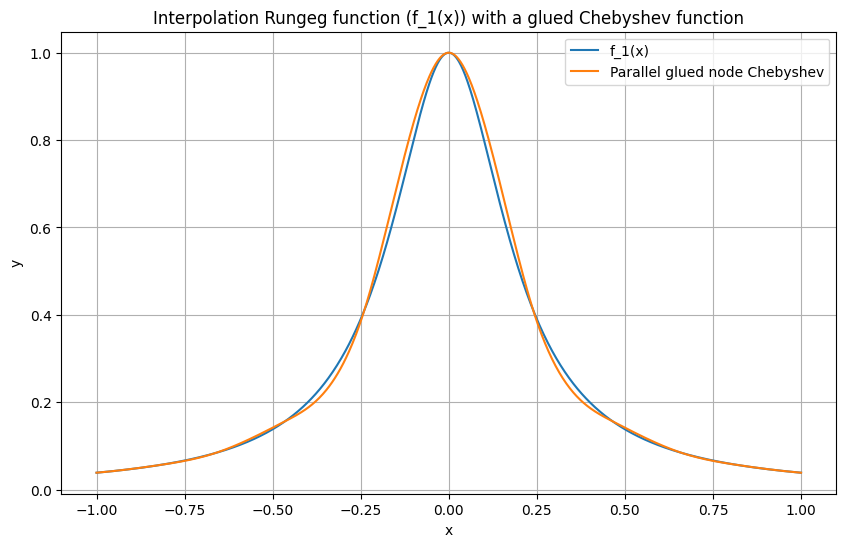

In [151]:
plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label='f_1(x)')
plt.plot(x_dense, cs_chebyshev(x_dense), label="Parallel glued node Chebyshev")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Rungeg function (f_1(x)) with a glued Chebyshev function')
plt.legend()
plt.grid(True)
plt.show()

### Funkcja obliczająca normę błędu

In [152]:
def error_norm(f_true, f_approx):
    return np.linalg.norm(f_true - f_approx)

### Interpolacja i obliczanie błędów

In [153]:
def interpolate_and_cacluate_errors(f, nodes_generator, interpolation_method, num_nodes_range):
    errors = []
    for n in num_nodes_range:
        nodes = nodes_generator(n)
        values = f(nodes)
        random_points = np.random.uniform(-1, 1, 500)
        true_values = f(random_points)
        interpolated_values = interpolation_method(random_points, nodes, values)
        errors.append(error_norm(true_values, interpolation_method(random_points, nodes, values)))
    return errors

### Zakres liczby węzłow interpolacji

In [154]:
num_nodes_range = range(4,51)

### Obliczanie błędów dla f_1(x)

In [155]:
errors_equidistant_f1 = interpolate_and_cacluate_errors(f1, equidistant_nodes, lagrange_interpolation, num_nodes_range)
errors_chebyshev_f1 = interpolate_and_cacluate_errors(f1, chebyshev_nodes, lagrange_interpolation, num_nodes_range)

### Obliczanie błędow dla f_2(x)

In [156]:
errors_equidistant_f2 = interpolate_and_cacluate_errors(f2, equidistant_nodes, lagrange_interpolation, num_nodes_range)
errors_chebyshev_f2 = interpolate_and_cacluate_errors(f2, chebyshev_nodes, lagrange_interpolation, num_nodes_range)

### Wykresy błędów

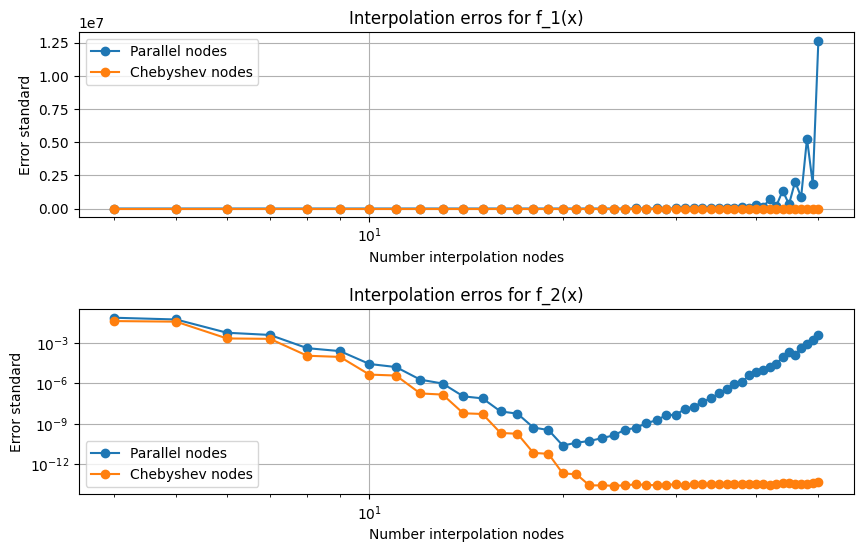

In [157]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 1)
plt.plot(num_nodes_range, errors_equidistant_f1, label="Parallel nodes", marker='o')
plt.plot(num_nodes_range, errors_chebyshev_f1, label="Chebyshev nodes", marker='o')
plt.title('Interpolation erros for f_1(x)')
plt.xlabel('Number interpolation nodes')
plt.ylabel('Error standard')
plt.legend()
plt.xscale("log")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(num_nodes_range, errors_equidistant_f2, label="Parallel nodes", marker='o')
plt.plot(num_nodes_range, errors_chebyshev_f2, label="Chebyshev nodes", marker='o')
plt.title('Interpolation erros for f_2(x)')
plt.xlabel('Number interpolation nodes')
plt.ylabel('Error standard')
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.show()